# NB! At the moment the code works for pure metal and MeO nanoparticles, but not for oxides that contain multiple different metals.

In [1]:
# Importing functions from uppin_fns.py
from uppin_fns import gen_data, kneedle, find_coord, xyz_freeze_core

# For charged atoms i have used ionic radii (crystal) [https://en.wikipedia.org/wiki/Ionic_radius]
# For neutral atoms I have used atomic radii [https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page)]
# This dictionary can be modified if the atom types under study are not listed in it.
ionic_radii={'O2-':1.26,'Ti4+':0.745,'Si4+':0.54,'Au0':1.44,'Zn2+':0.88,'Ce4+':1.01,'Co0':1.25}

## User input:

In [2]:
filename = 'TiO2_136u.xyz' #Name of the XYZ file to be analyzed
# Define the two atoms that are coordinated with eachother: 
particle1 = 'Ti4+'
particle2 = 'O2-' # For pure metal particle1 should be the same as particle2.
r_bond = 1.1*(ionic_radii[particle1]+ionic_radii[particle2]) #Cut-off bond length calculated in angstoms
#r_bond = 2.2055 


data,max_r = gen_data(filename,r_bond) # Generates necessary input for the calculations below
print(f'Maximum radius of nanoparticle is: {max_r}')

Maximum radius of nanoparticle is: 1.05


In [3]:
# Define the search radius for ideal shell depth.
## Make sure that the maximum value is a bit smaller than the Maximum radius of NP.
## Otherwise there will not be any atoms in the shell and the next steps will fail.
# At the moment defined as 0.1 nm to 1.0 nm with 0.1 nm step. 
test_dist = [i/10 for i in range(2,10,1)] 

## Calculation of optimal shell depth:

### Here we use kneedle function:
#### kneedle(distances, input_data, atom_type, show_graph) -> Optimal_shell_depth

### Inputs:
#### distances - list of distances to be tested
#### input_data - data generated from the xyz_file with gen_data function
#### atom_type - has three options ('all', 'Me', 'O'), but 'all' is defined as default value
#### show_graph - Shows the C.N. vs shell depth on graph. Options (True, False) and is True by default.

### Output:
#### Optimal_shell_depth - given as a floating point number.

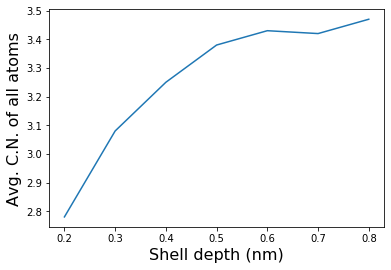

Optimal shell depth according to all atoms: 0.5 nm


In [4]:
shell_depth_all = kneedle(test_dist, data)
print(f'Optimal shell depth according to all atoms: {shell_depth_all} nm')

# Optional:
## Shell depth calculation according to only Me or O atoms:

In [5]:
# According to metal atoms:
shell_depth_Me = kneedle(test_dist, data, 'Me', False)
print(f'Optimal shell depth according to Me atoms: {shell_depth_Me} nm')


Optimal shell depth according to Me atoms: 0.4 nm


In [6]:
# According to oxygen atoms:
shell_depth_O = kneedle(test_dist, data, 'O', False)
print(f'Optimal shell depth according to O atoms: {shell_depth_O} nm')

Optimal shell depth according to O atoms: 0.5 nm


## Calculation on average coordination number (C.N.) for different types of atoms:

### Here we use find_coord function:
#### find_coord(input_data, atom_type, shell_depth)

### Inputs:
#### input_data - data generated from the xyz_file with gen_data function (the same as for kneedle function).
#### atom_type -  has three options ('all', 'Me', 'O'). 'all' is defined as default value.
#### shell_depth - user defined shell depth (floating point number). Has a default value of 0.5 nm.

### Output:
#### Prints the coordination numbers in three regions (whole NP, NP core and NP shell).

In [7]:
find_coord(data, 'all',shell_depth_all)
find_coord(data, 'Me',0.5)
find_coord(data, 'O',0.5)

Avg. C.N. of all atoms:
In nanoparticle: 3.46
In core region: 4.04
In shell region: 3.38

Avg. C.N. of Me atoms:
In nanoparticle: 5.19
In core region: 6.0
In shell region: 5.07

Avg. C.N. of O atoms:
In nanoparticle: 2.6
In core region: 3.0
In shell region: 2.54



## Make a .xyz file with '! T T T' command added to core atoms.

### Here we use xyz_freeze_core function:
#### xyz_freeze_core(input_data, shell_depth, Me_atom, o_file_name) -> .xyz file

### Inputs:
#### input_data - data generated from the xyz_file with gen_data function (the same as for kneedle function).
#### shell_depth - user defined shell depth (floating point number). Has a default value of 0.5 nm.
#### Me_atom - The name of the Me atoms to convert it back to its original form. It has been changed to 1!!
#### o_file__name - Give your output file a name. Default value for convenience is Freeze.xyz.

### Output:
#### Outputs .xyz file with the name that was given

In [8]:
xyz_freeze_core(data, 0.5, 'Ti', 'TiO2_freeze.xyz')

## XYZ to POSCAR

In [9]:
from get_POSCAR_modified import xyz2POSCAR

in_file = 'TiO2_freeze.xyz'
out_file = 'POSCAR_21'

xyz2POSCAR(in_file,out_file)

Do you want to type by hand or use the default vaules ( 40 x 40 x 40) ?
n
Done! the POSCAR is named as POSCAR_21
